In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML

In [ ]:
t, l, r, g, m = smp.symbols('t l r g m', real=True)
Ixx, Iyy, Izz = smp.symbols('I_{xx}, I_{yy}, I_{zz}', real=True)
the, phi, psi = smp.symbols(r'\theta \phi \psi', cls=smp.Function)
the=the(t)
phi=phi(t)
psi=psi(t)

In [ ]:
#First Derivatives
the_d = smp.diff(the,t)
phi_d = smp.diff(phi,t)
psi_d = smp.diff(psi,t)

In [ ]:
#Second Derivatives
the_dd = smp.diff(the_d,t)
phi_dd = smp.diff(phi_d,t)
psi_dd = smp.diff(psi_d,t)

In [ ]:
#Initial Variables
l = 0.04 #Half length of pendulum
g = 9.8  #Gravity
r = 0.01 #Radius of pendulum
m = (r*100)**2*np.pi*l*6/10

#Rotational Inertia
Ixx = m*(3*r*r+l**2)/12
Iyy = m*(3*r*r+l**2)/12
Izz = 0.5*m*r*r
I = smp.Matrix([[Ixx,0,0],[0,Iyy,0],[0,0,Izz]])

#Initial Coordinates
x = (r-r*smp.cos(the)+l*smp.sin(the))*smp.cos(phi)
y = (r-r*smp.cos(the)+l*smp.sin(the))*smp.sin(phi)
z = -(r*smp.sin(the)+l*smp.cos(the))

In [ ]:
#Transitional Velocity
x_d = smp.diff(x,t)
y_d = smp.diff(y,t)
z_d = smp.diff(z,t)

In [ ]:
#Angular Velocity
omega = smp.Matrix([phi_d*smp.sin(the)*smp.sin(psi)+the_d*smp.cos(psi),
                    phi_d*smp.sin(the)*smp.cos(psi)-the_d*smp.sin(psi),
                    phi_d*smp.cos(the)+psi_d])

In [ ]:
#Kinetic Energy
Tran = 0.5*m*(x_d**2+y_d**2+z_d**2)
Rota = 0.5*omega.T.dot(I*omega).simplify()
T = Tran+Rota

In [ ]:
#Potential Energy
Grav = m*g*z
M = 20000000000
mu_0 = 4*(10**(-7))
A1 = (z+l)/((((z+l)**2+r**2)**0.5))
A2 = z/((z**2+r**2)**0.5)
A = A1-A2
C = mu_0*M/2
B_z = C*A
Vol = 3.14*r*r*l
mu = Vol*M
K =( mu**2 / (x **2 + y **2 + z **2) )**0.5
Magn = - (z*K * B_z)
V = Grav+Magn

In [ ]:
#Solving Equation
L = T-V
LE1 = smp.diff(L,the)-smp.diff(smp.diff(L, the_d),t)
LE2 = smp.diff(L,phi)-smp.diff(smp.diff(L, phi_d),t)
LE3 = smp.diff(L,psi)-smp.diff(smp.diff(L, psi_d),t)

In [ ]:
LE3 = LE3.simplify()

In [ ]:
LE2 = LE2.simplify()

In [ ]:
LE1 = LE1.simplify()

In [ ]:
#Equation Solved
sols = smp.solve([LE1,LE2,LE3], (the_dd,phi_dd,psi_dd),
                 simplify=False, rational=False)

In [ ]:
#Function Defining
dz1dt_f = smp.lambdify((the,phi,psi,the_d,phi_d,psi_d),sols[the_dd])
dthedt_f = smp.lambdify(the_d,the_d)

dz2dt_f = smp.lambdify((the,phi,psi,the_d,phi_d,psi_d),sols[phi_dd])
dphidt_f = smp.lambdify(phi_d,phi_d)

dz3dt_f = smp.lambdify((the,phi,psi,the_d,phi_d,psi_d),sols[psi_dd])
dpsidt_f = smp.lambdify(psi_d,psi_d)


In [ ]:
#Numerical Function
def dSdt(S,t):
    the, z1, phi, z2, psi, z3 = S
    return [
        dthedt_f(z1),
        dz1dt_f(the,phi,psi,z1,z2,z3),
        dphidt_f(z2),
        dz2dt_f(the,phi,psi,z1,z2,z3),
        dpsidt_f(z3),
        dz3dt_f(the,phi,psi,z1,z2,z3),
    ]

In [ ]:
#Numerical Solution
time = 10
samples = time*10000
t = np.linspace(0,time,samples)
ans1 = odeint(dSdt,y0 = [0.141,0,0,10,0,0], t = t)
theta = ans1.T[0]
phi = ans1.T[2]
theta_d = ans1.T[1]
phi_d = ans1.T[3]



NameError: ignored

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


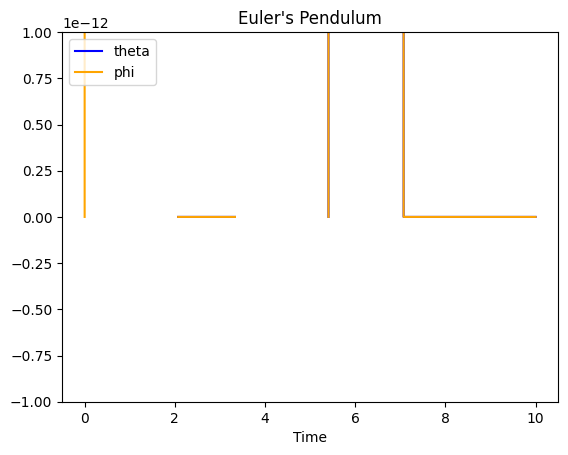

In [ ]:
#Matplotlib Graphing
plt.title('Euler\'s Pendulum')
plt.xlabel('Time')
plt.plot(t,theta, color='blue', label='theta')
plt.plot(t, phi, color='orange', label='phi')
#plt.plot(t, theta_d, color='green', label='theta_d')
#plt.plot(t, phi_d, color='red', label='phi_d')
plt.legend(loc='upper left')
plt.show()